<a href="https://colab.research.google.com/github/TSGreenwood/tsgreenwood.github.io/blob/google_cloud/bike_routes_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Preprocessing of TNETBikeNetwork.gpkg

This dataset is too big to host on github or google drive, so I hosted in in google cloud.

In [1]:
from google.colab import auth
auth.authenticate_user()

Setting GCS Project and my Google Cloud project ID

In [3]:
!gcloud config set project 'taragreenwoodpersonalwebsite'

Updated property [core/project].


In [ ]:
#!pip install gcsfs geopandas

Bring hefty dataset in for geopandas manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import geopandas as gpd

In [8]:
#Info about this dataset here: https://gis-kingcounty.opendata.arcgis.com/datasets/fe12aabfcd704a0998f16715a81ccd43_1458/about and here:https://www5.kingcounty.gov/sdc/FGDCDocs/TRANS_NETWORK_BIKE_faq.htm
bike_routes_gdf = gpd.read_file('gs://kingcountypublictransit/data/TNETBikeNetwork.gpkg')

Info about this dataset here: https://gis-kingcounty.opendata.arcgis.com/datasets/fe12aabfcd704a0998f16715a81ccd43_1458/about and here:https://www5.kingcounty.gov/sdc/FGDCDocs/TRANS_NETWORK_BIKE_faq.htm

In [13]:
#This dataset has too much unnecessary information so we'll reduce dimensions
bike_columns_to_drop = ['OBJECTID'

]

NameError: name 'bike_columns' is not defined

In [11]:
bike_routes_gdf.info()
bike_routes_gdf.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 143876 entries, 0 to 143875
Data columns (total 33 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   OBJECTID    143876 non-null  int64   
 1   TLINK_ID    143876 non-null  int64   
 2   CREATEDATE  143876 non-null  object  
 3   EFFEC_DATE  143876 non-null  object  
 4   DB_MD_DATE  143876 non-null  object  
 5   END_DATE    136290 non-null  object  
 6   CFCC_ID     143876 non-null  object  
 7   GRADE       143876 non-null  int64   
 8   FR_TPOINT   143876 non-null  int64   
 9   TO_TPOINT   143876 non-null  int64   
 10  PREFIX_L    49359 non-null   object  
 11  NAME_L      143876 non-null  object  
 12  TYPE_L      127397 non-null  object  
 13  SUFFIX_L    56432 non-null   object  
 14  PREFIX_R    49361 non-null   object  
 15  NAME_R      143876 non-null  object  
 16  TYPE_R      127402 non-null  object  
 17  SUFFIX_R    56442 non-null   object  
 18  FULLNAME_L  1438

,OBJECTID,TLINK_ID,CREATEDATE,EFFEC_DATE,DB_MD_DATE,END_DATE,CFCC_ID,GRADE,FR_TPOINT,TO_TPOINT,...,A_NAME_R,JURIS_L,JURIS_R,CITY_L,CITY_R,ZIP_L,ZIP_R,ROLL_LEN,Shape_Leng,geometry
0,1,9537,1993-06-28,1993-06-28,2002-01-25,4000-01-01,A40,0,101697,101900,...,None,35,35,Kent,Kent,98031.0,98031.0,342.410418,342.410418,"LINESTRING (-122.21422 47.41899, -122.21422 47..."
1,2,113165,1995-09-28,1995-09-28,2018-01-18,4000-01-01,A40,0,1585,1587,...,None,65,65,Shoreline,Shoreline,98155.0,98155.0,153.300000,153.300073,"LINESTRING (-122.30659 47.77427, -122.30597 47..."
2,3,21455,1993-06-28,1993-06-28,2010-07-14,4000-01-01,A40,0,302912,92695,...,None,76,76,Tukwila,Tukwila,98188.0,98188.0,65.265000,64.742908,"LINESTRING (-122.27349 47.45626, -122.27323 47..."
3,4,9889,1993-06-28,1993-06-28,1995-11-15,4000-01-01,A40,0,86397,344665,...,None,36,36,King County,King County,98059.0,98059.0,268.068564,268.068564,"LINESTRING (-122.10365 47.48038, -122.10364 47..."
4,5,115925,1993-06-28,1993-06-28,2016-09-22,4000-01-01,A40,0,97983,98111,...,None,11,11,Burien,Burien,98148.0,98148.0,214.350000,214.349847,"LINESTRING (-122.32989 47.43516, -122.32998 47..."


<Axes: >

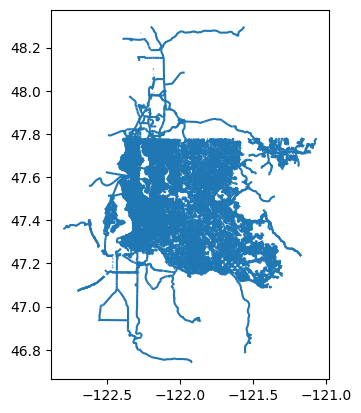

In [12]:
bike_routes_gdf.plot()